In [1]:
import seaborn as sns
import pandas as pd

In [2]:
review_references = pd.read_csv('../data/reference_distributions_all.csv')

In [3]:
len(review_references)

11826208

In [4]:
review_references.head()

,pubmed_doi,review,references_count,references_contradicted_total,references_contradicted_avg,references_mentioned_total,references_mentioned_total_avg,references_supported_total,references_supported_avg,in_text_citations_to_references_total,in_text_citations_to_references_total_avg,citations_to_references_total,citations_to_references_total_avg,contradiction_percentage_avg,mentioning_percentage_avg,supporting_percentage_avg,contradiction_to_supporting_ratio_avg,contradiction_to_supporting_contradiction_ratio_avg,supporting_to_supporting_contradiction_ratio_avg
0,10.1001/10-v4n2-hsf10003,1,20,3,0.150000,1463,73.150000,5,0.250000,1508,75.400000,1761,88.050000,0.029448,0.977040,0.030951,1.025000,0.875000,0.941667
1,10.1001/2012.jama.10158,0,9,26,2.888889,13985,1553.888889,219,24.333333,14355,1595.000000,15598,1733.111111,0.005554,0.971264,0.026994,0.211124,0.202591,0.943408
2,10.1001/2012.jama.10161,0,4,1,0.250000,500,125.000000,11,2.750000,514,128.500000,541,135.250000,0.020887,0.972988,0.037882,0.475000,0.450000,0.950000
3,10.1001/2012.jama.10368,0,16,39,2.437500,4145,259.062500,220,13.750000,4464,279.000000,4579,286.187500,0.017987,0.932648,0.054987,0.352624,0.293176,0.853372
4,10.1001/2012.jama.10465,0,19,35,1.842105,4623,243.315789,183,9.631579,5081,267.421053,10217,537.736842,0.023245,0.916877,0.056893,0.365305,0.313817,0.901969


In [5]:
review_references['review'] = review_references['review'].clip(upper=1)

In [6]:
review_references['ratio'] = (review_references['references_contradicted_total'] + 1) / (review_references['references_supported_total'] + 1)
review_references['si'] = (review_references['references_supported_total'] + 1)  / (review_references['references_supported_total'] +  review_references['references_contradicted_total'] + 1)

In [7]:
review_references[review_references['review'] > 0].describe().applymap("{0:.2f}".format)

,review,references_count,references_contradicted_total,references_contradicted_avg,references_mentioned_total,references_mentioned_total_avg,references_supported_total,references_supported_avg,in_text_citations_to_references_total,in_text_citations_to_references_total_avg,citations_to_references_total,citations_to_references_total_avg,contradiction_percentage_avg,mentioning_percentage_avg,supporting_percentage_avg,contradiction_to_supporting_ratio_avg,contradiction_to_supporting_contradiction_ratio_avg,supporting_to_supporting_contradiction_ratio_avg,ratio,si
count,1125317.00,1125317.00,1125317.00,1125317.00,1125317.00,1125317.00,1125317.00,1125317.00,1125317.00,1125317.00,1125317.00,1125317.00,1125317.00,1125317.00,1125317.00,1125317.00,1125317.00,1125317.00,1125317.00,1125317.00
mean,1.00,95.71,102.71,1.10,27471.01,293.97,841.49,8.21,29053.15,311.14,34691.22,386.43,0.04,0.93,0.07,0.54,0.49,0.93,0.17,0.88
std,0.00,91.54,220.25,2.52,42021.30,466.11,1519.99,14.19,44485.63,490.51,50240.15,628.49,0.03,0.04,0.03,0.19,0.18,0.04,0.19,0.07
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.05,0.00,0.02,0.02,0.20,0.00,0.03
25%,1.00,34.00,16.00,0.35,4234.00,91.14,123.00,2.79,4585.00,98.60,6057.00,127.74,0.02,0.92,0.05,0.40,0.36,0.91,0.09,0.85
50%,1.00,73.00,52.00,0.72,14029.00,180.09,396.00,5.51,14997.00,192.44,18569.00,236.38,0.03,0.94,0.07,0.53,0.47,0.94,0.13,0.89
75%,1.00,130.00,123.00,1.29,34740.00,337.69,1002.00,9.96,36764.00,358.00,44191.00,436.54,0.05,0.95,0.08,0.67,0.60,0.96,0.20,0.92
max,1.00,3455.00,28378.00,319.00,2321761.00,97208.00,139489.00,1684.00,2604849.00,98858.00,6689518.00,215223.00,1.00,1.00,1.00,5.00,1.00,1.00,33.00,1.00


In [8]:
review_references[review_references['review'] > 0].describe().applymap("{0:.2f}".format).to_csv('./description_of_reviews.csv')

In [9]:
review_references[review_references['review'] == 0].describe().applymap("{0:.2f}".format)

,review,references_count,references_contradicted_total,references_contradicted_avg,references_mentioned_total,references_mentioned_total_avg,references_supported_total,references_supported_avg,in_text_citations_to_references_total,in_text_citations_to_references_total_avg,citations_to_references_total,citations_to_references_total_avg,contradiction_percentage_avg,mentioning_percentage_avg,supporting_percentage_avg,contradiction_to_supporting_ratio_avg,contradiction_to_supporting_contradiction_ratio_avg,supporting_to_supporting_contradiction_ratio_avg,ratio,si
count,10700891.00,10700891.00,10700891.00,10700891.00,10700891.00,10700891.00,10700891.00,10700891.00,10700891.00,10700891.00,10700891.00,10700891.00,10700891.00,10700891.00,10700891.00,10700891.00,10700891.00,10700891.00,10700891.00,10700891.00
mean,0.00,38.85,45.06,1.05,16687.68,392.03,384.04,8.36,17431.52,409.83,23265.90,582.69,0.05,0.92,0.09,0.55,0.49,0.93,0.20,0.89
std,0.00,35.17,93.78,2.67,31577.14,922.36,718.63,18.01,32590.30,946.84,47504.41,1783.83,0.05,0.05,0.05,0.22,0.20,0.06,0.27,0.08
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.01,0.00,0.00,0.00,0.12,0.00,0.02
25%,0.00,14.00,4.00,0.25,1216.00,68.18,39.00,2.36,1323.00,74.29,1872.00,103.41,0.02,0.91,0.06,0.38,0.34,0.90,0.09,0.85
50%,0.00,31.00,19.00,0.63,5552.00,167.46,165.00,5.27,5949.00,179.25,7694.00,229.57,0.04,0.93,0.07,0.51,0.45,0.94,0.13,0.90
75%,0.00,54.00,53.00,1.26,17818.00,392.42,453.00,10.00,18827.00,414.42,23296.00,525.10,0.06,0.95,0.10,0.67,0.60,0.97,0.22,0.94
max,0.00,3734.00,17912.00,319.00,3121755.00,97208.00,84054.00,1841.00,3149928.00,98858.00,6312944.00,225838.00,1.00,1.00,1.00,8.00,1.00,1.00,43.00,1.00


In [10]:
review_references[review_references['review'] == 0].describe().applymap("{0:.2f}".format).to_csv('./description_of_non_reviews.csv')

In [11]:
train_df = pd.read_csv('../data/review_references_title_abstracts_sample_train.csv')
test_df = pd.read_csv('../data/review_references_title_abstracts_sample_test.csv')

In [12]:
print("length of train dataset", len(train_df))
print("Number of reviews in train dataset", len(train_df[train_df['review'] > 0]))
print("Number of non-reviews in train dataset", len(train_df[train_df['review'] == 0]))
print("length of test dataset", len(test_df))
print("Number of reviews in test dataset", len(test_df[test_df['review'] > 0]))
print("Number of non-reviews in test dataset", len(test_df[test_df['review'] == 0]))

length of train dataset 80000
Number of reviews in train dataset 7496
Number of non-reviews in train dataset 72504
length of test dataset 80000
Number of reviews in test dataset 7496
Number of non-reviews in test dataset 72504


## Generate Figures


In [54]:
sample = 1_000_000
subsamp = pd.concat([
    review_references[review_references['review'] > 0].sample(sample),
    review_references[review_references['review'] == 0].sample(sample)
])
subsamp['review'] = subsamp['review'].apply(
    lambda x: 'yes' if x > 0 else 'no'
)

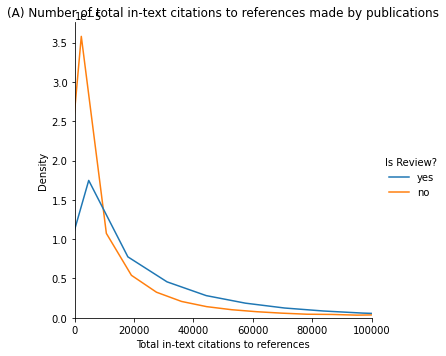

In [55]:
plt = sns.displot(data=subsamp, x="in_text_citations_to_references_total", hue="review")
plt.set(xlim=(0, 100000))
plt.set(ylim=(0, 40000))
plt.set(xlabel = "Total in-text citations to references", ylabel = "Publications", title="Number of in-text citations to references made by publications")
plt.legend.set(title='Is Review?')
plt.savefig('in_text_citations_to_references_total.png', format='png', dpi=1200)

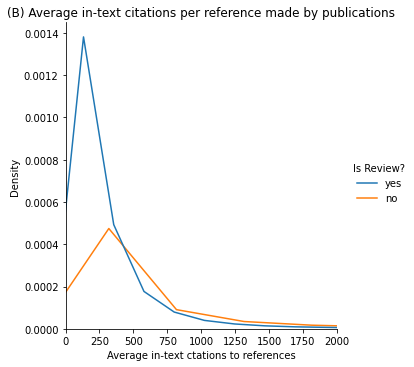

In [56]:
plt = sns.displot(data=subsamp, x="in_text_citations_to_references_total_avg", hue="review")
plt.set(xlim=(0, 2000))
plt.set(xlabel = "Average in-text ctations to references", ylabel = "Publications", title="Average in-text citations per reference made by publications")
plt.legend.set(title='Is Review?')
plt.savefig('in_text_citations_to_references_total_avg.png', format='png', dpi=1200)

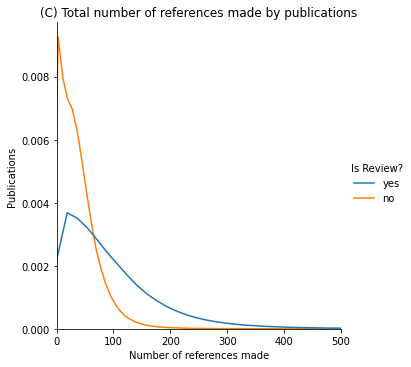

In [61]:
plt = sns.displot(data=subsamp, x="references_count", hue="review")
plt.set(xlim=(0, 500))
plt.set(ylim=(0, 25000))
plt.set(xlabel = "Number of references made", ylabel = "Publications", title="Total number of references made by publications")
plt.legend.set(title='Is Review?')
plt.savefig('references_count.png', format='png', dpi=1200)

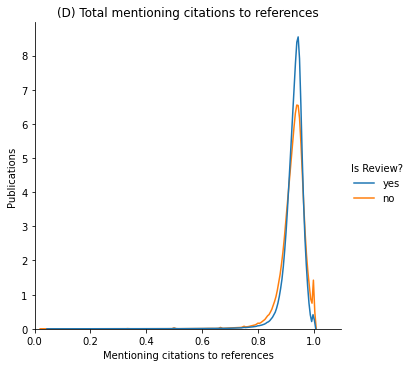

In [62]:
plt = sns.displot(data=subsamp, x="references_mentioned_total", hue="review")
plt.set(xlim=(0, 100000))
plt.set(ylim=(0, 50000))
plt.set(xlabel = "Mentioning citations to references", ylabel = "Publications", title="Total number of mentioning citations to references")
plt.legend.set(title='Is Review?')
plt.savefig('references_mentioned_total.png', format='png', dpi=1200)

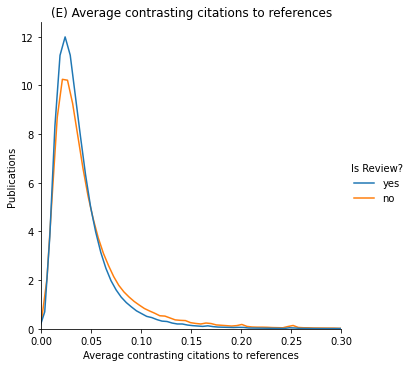

In [63]:
plt = sns.displot(data=subsamp, x="contradiction_percentage_avg", hue="review")
plt.set(xlim=(0, 0.3))
plt.set(xlabel = "Average contrasting citations to references", ylabel = "Publications", title="Total number of contrasting citations to references")
plt.legend.set(title='Is Review?')
plt.savefig('contradiction_percentage_avg.png', format='png', dpi=1200)

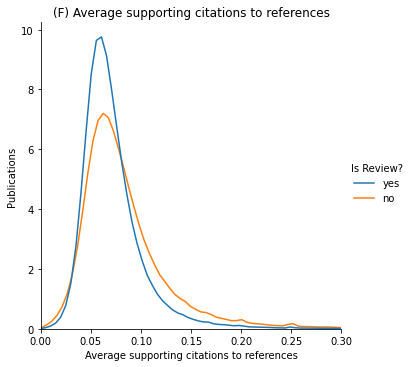

In [64]:
plt = sns.displot(data=subsamp, x="supporting_percentage_avg", hue="review")
plt.set(xlim=(0, 0.3))
plt.set(xlabel = "Average supporting citations to references", ylabel = "Publications", title="Total number of supporting citations to references")
plt.legend.set(title='Is Review?')
plt.savefig('supporting_percentage_avg.png', format='png', dpi=1200)